In [1]:
import pandas as pd
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
dataset = pd.read_csv("data/dataset_train.csv")

In [3]:
dataset.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,39073.000000,3.907300e+04,39073.000000,39073.000000,39073.000000,39073.000000
mean,38.612059,1.899919e+05,10.074348,1073.161621,87.036189,40.398101
std,13.718415,1.060121e+05,2.569016,7458.351040,402.115470,12.435016
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177790e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783440e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.378650e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 15 columns):
age                39073 non-null int64
workclass          39073 non-null object
fnlwgt             39073 non-null int64
education          39073 non-null object
educational-num    39073 non-null int64
marital-status     39073 non-null object
occupation         39073 non-null object
relationship       39073 non-null object
race               39073 non-null object
gender             39073 non-null object
capital-gain       39073 non-null int64
capital-loss       39073 non-null int64
hours-per-week     39073 non-null int64
native-country     39073 non-null object
income             39073 non-null object
dtypes: int64(6), object(9)
memory usage: 4.5+ MB


In [5]:
workclass_count = dataset["workclass"].value_counts()
workclass_count

Private             27164
Self-emp-not-inc     3087
Local-gov            2496
?                    2222
State-gov            1578
Self-emp-inc         1344
Federal-gov          1155
Without-pay            17
Never-worked           10
Name: workclass, dtype: int64

In [6]:
# workclass_count.iplot(kind='bar', yTitle='count', title='workclass',
#              filename='workclass')

In [7]:
# wc = dataset.groupby(["income", "workclass"]).size()
# wc.iplot(kind='bar', yTitle='count', title='workclass',
#              filename='workclass')

In [8]:
dataset.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,?,101761,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,>50K
1,57,Private,190942,1st-4th,2,Widowed,Priv-house-serv,Not-in-family,Black,Female,0,0,30,United-States,<=50K
2,27,Private,141545,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1902,45,United-States,<=50K
3,61,Self-emp-not-inc,392694,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,>50K
4,34,State-gov,327902,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,<=50K
5,18,Private,165532,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,<=50K
6,37,State-gov,26898,Assoc-acdm,12,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
7,40,Private,111779,11th,7,Divorced,Other-service,Unmarried,Black,Female,0,0,36,United-States,<=50K
8,45,Private,165822,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States,>50K
9,33,State-gov,162705,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,>50K


In [9]:
dataset["income"].describe()

count     39073
unique        2
top       <=50K
freq      29742
Name: income, dtype: object

In [10]:
dataset["income"] = dataset["income"].map({'<=50K':0, '>50K':1})

In [11]:
dataset.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,?,101761,Some-college,10,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,1
1,57,Private,190942,1st-4th,2,Widowed,Priv-house-serv,Not-in-family,Black,Female,0,0,30,United-States,0
2,27,Private,141545,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,1902,45,United-States,0
3,61,Self-emp-not-inc,392694,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,50,United-States,1
4,34,State-gov,327902,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States,0


In [12]:
dataset["gender"] = dataset["gender"].map({'Male': 1, 'Female': 0})

In [13]:
dataset.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,?,101761,Some-college,10,Married-civ-spouse,?,Husband,White,1,0,0,40,United-States,1
1,57,Private,190942,1st-4th,2,Widowed,Priv-house-serv,Not-in-family,Black,0,0,0,30,United-States,0
2,27,Private,141545,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,1,0,1902,45,United-States,0
3,61,Self-emp-not-inc,392694,Some-college,10,Divorced,Exec-managerial,Not-in-family,White,1,0,0,50,United-States,1
4,34,State-gov,327902,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,0,0,55,United-States,0


In [14]:
# country = dataset["native-country"]

In [15]:
# from sklearn import preprocessing
# label_encode = preprocessing.LabelEncoder()
# x = label_encode.fit_transform(country)

In [16]:
# dfx = pd.DataFrame(x)

In [17]:
# dfx[0].value_counts().iplot(kind='bar', yTitle='count', title='workclass',filename='workclass')

In [18]:
# df_object = dataset.select_dtypes(include=["object"])
# df_object.columns

In [19]:
# df_object_encode = df_object.apply(label_encode.fit_transform)

In [20]:
# df_object_encode.head()

In [21]:
# dataset = dataset.drop(df_object_encode.columns, axis=1)
# dataset = pd.concat([dataset, df_object_encode], axis=1)


In [22]:
# dataset.head(10)

In [23]:
# X = dataset.drop('income', axis=1)
# y = dataset["income"]

In [24]:
# test_dataset = pd.read_csv("data/testset.csv")

In [25]:
# def encode_dataset(dataframe):
#     dataframe["income"] = dataframe["income"].map({'<=50K':0, '>50K':1})
#     dataframe["gender"] = dataframe["gender"].map({'Male': 1, 'Female': 0})
    
#     return dataframe
    

In [26]:
# test_data_process = encode_dataset(test_dataset)

In [27]:
# test_data_process.head(10)

In [28]:
def encode_dataset(dataframe):
    dataframe["workclass"] = dataframe["workclass"].map({'Private': 0, 'Self-emp-not-inc': 1,'Local-gov': 2, '?':3,'State-gov': 4, 'Self-emp-inc': 5, 'Federal-gov': 6, 'Without-pay': 7,'Never-worked':8 })
    dataframe["education"] = dataframe["education"].map({'HS-grad': 0, 'Some-college': 1,'Bachelors': 2, '?':3,'Masters': 4, 'Assoc-voc': 5, '11th': 6, 'Assoc-acdm': 7,'10th':8, '7th-8th': 9,'Prof-school':10, '9th': 10, '12th': 11,'Doctorate': 12,'5th-6th': 13, '1st-4th': 14,'Preschool': 15   })
    dataframe["marital-status"] = dataframe["marital-status"].map({'Married-civ-spouse': 0, 'Never-married': 1, 'Divorced': 2,'Widowed': 3, 'Separated': 4, 'Married-spouse-absent': 5,'Married-AF-spouse': 6 })
    dataframe["occupation"] = dataframe["occupation"].map({'Prof-specialty': 0, 'Craft-repair': 1, 'Exec-managerial': 2,'Adm-clerical': 3, 'Sales': 4, 'Other-service': 5,'Machine-op-inspct': 6, '?': 7,'Transport-moving': 8, 'Handlers-cleaners': 9,'Farming-fishing': 10,'Tech-support': 11,'Protective-serv': 12,'Priv-house-serv': 13, 'Armed-Forces': 14})
    dataframe["relationship"] = dataframe["relationship"].map({'Husband': 0, 'Not-in-family': 1,'Own-child': 2, 'Wife':3,'Other-relative': 4, 'Unmarried': 5})
    dataframe["race"] = dataframe["race"].map({'White': 0, 'Black': 1,'Asian-Pac-Islander': 2, 'Amer-Indian-Eskimo':3,'Other': 4})
    dataframe["gender"] = dataframe["gender"].map({'Male': 1, 'Female': 0})
    dataframe["native-country"] = dataframe["native-country"].replace(['United-States'], 0)
    dataframe["native-country"] = dataframe["native-country"].replace(['Mexico', '?', 'Philippines', 'Puerto-Rico', 'Canada', 'Germany', 'El-Salvador', 'Cuba', 'India', 'England', 'China', 'Dominican-Republic', 'Italy', 'South', 'Columbia', 'Japan', 'Jamaica', 'Poland', 'Guatemala', 'Haiti', 'Vietnam', 'Taiwan', 'Iran', 'Portugal', 'Ecuador', 'Nicaragua', 'Greece', 'Peru', 'Ireland', 'France', 'Cambodia', 'Thailand', 'Hong', 'Trinadad&Tobago', 'Honduras', 'Laos', 'Outlying-US(Guam-USVI-etc)', 'Yugoslavia', 'Hungary', 'Scotland', 'Holand-Netherlands'], 1)
    dataframe["income"] = dataframe["income"].map({'<=50K':0, '>50K':1})
    return dataframe

In [29]:
data_train = pd.read_csv("data/trainset.csv")

In [30]:
data_train_encode = encode_dataset(data_train)

In [31]:
data_test = pd.read_csv("data/testset.csv")

In [32]:
data_test_encode = encode_dataset(data_test)

In [33]:
data_train_encode.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,21,0,34816,5,11,0,3,3,0,0,0,0,12,0,0
1,42,1,221172,0,9,2,1,1,0,1,0,0,40,0,0
2,68,3,286869,9,4,3,7,1,0,0,0,1668,40,1,0
3,30,0,348592,0,9,0,6,0,0,1,0,0,44,0,0
4,30,0,94235,2,13,0,0,0,0,1,0,1977,50,0,1
5,36,5,166880,0,9,1,5,1,0,0,0,0,70,0,0
6,20,0,97295,1,10,1,3,1,0,0,0,0,25,0,0
7,27,1,70657,1,10,1,1,1,0,1,0,0,35,0,0
8,61,0,85194,1,10,0,11,0,0,1,0,0,25,0,0
9,32,2,267859,1,10,0,12,0,0,1,0,0,50,1,0


In [34]:
data_test_encode.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,31,2,48520,7,12,1,12,5,0,1,0,0,40,0,0
1,32,0,309513,7,12,0,1,0,0,1,0,0,40,0,0
2,29,2,220419,2,13,1,12,1,0,1,0,0,56,0,0
3,34,2,254270,2,13,1,0,1,0,0,0,0,40,0,0
4,37,0,397752,0,9,5,10,4,0,1,0,0,12,1,0
5,34,2,211239,2,13,2,0,5,0,0,6497,0,40,0,0
6,56,0,274111,2,13,0,3,0,0,1,0,0,45,0,1
7,20,3,144685,1,10,1,7,2,2,0,0,1602,40,1,0
8,24,0,172987,2,13,0,11,0,0,1,0,0,50,0,0
9,59,6,115842,0,9,0,0,0,0,1,0,0,40,0,0


In [35]:
X = data_train_encode.drop('income', axis=1)
y = data_train_encode["income"]

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=24)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=24, verbose=0, warm_start=False)

In [37]:
Xtest = data_test_encode.drop('income', axis=1)
ytest = data_test_encode["income"]

In [38]:
y_pred = clf.predict(Xtest)

Random Forests accuracy 0.8621880998080614


In [40]:
private_data = pd.read_csv("data/p_test.csv")

In [41]:
p_test_encode = encode_dataset(private_data)

In [42]:
Xp = p_test_encode.drop('income', axis=1)
yp = p_test_encode["income"]

In [44]:
y_p = clf.predict(Xp)

In [46]:

print("Random Forests accuracy:", accuracy_score(yp, y_p))

Random Forests accuracy 0.8567918927218753


In [47]:
y_p

array([0, 0, 1, ..., 0, 0, 0])

In [48]:
# with open('linhph_01.txt', mode='wt', encoding='utf-8') as myfile:
#     myfile.write('\n'.join(str(line) for line in y_p))

In [49]:
from sklearn import neighbors
from sklearn.metrics import roc_curve, auc

In [50]:
list_neighbor = list(range(5,101, 2))

In [54]:

train_results = []
test_results = []
for n in list_neighbor:
   model = neighbors.KNeighborsClassifier(n_neighbors=n, p=2)
   model.fit(X, y)
   train_pred = model.predict(X)
   acc_score = accuracy_score(y, train_pred)
   train_results.append(acc_score)
   y_pred = model.predict(Xtest)
   acc_test = accuracy_score(ytest, y_pred)
   test_results.append(acc_test)



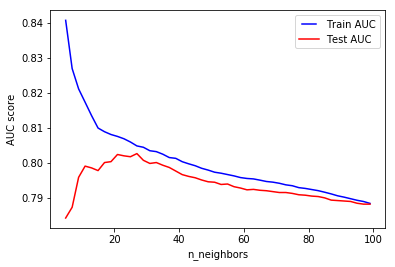

In [55]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(list_neighbor, train_results, 'b', label='Train AUC')
line2, = plt.plot(list_neighbor, test_results, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_neighbors")
plt.show()

In [56]:

train_result2 = []
test_results2 = []
for n in list_neighbor:
   model = neighbors.KNeighborsClassifier(n_neighbors=n, p=2)
   model.fit(X, y)
   train_pred = model.predict(X)
   acc_score = accuracy_score(y, train_pred)
   train_result2.append(acc_score)
   y_pred = model.predict(Xtest)
   acc_test = accuracy_score(ytest, y_pred)
   test_results2.append(acc_test)



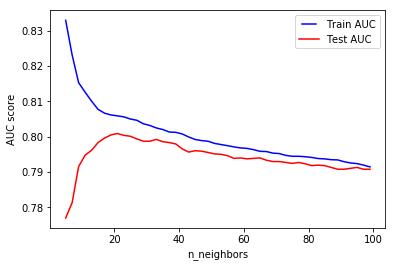

In [58]:
from matplotlib.legend_handler import HandlerLine2D
import matplotlib.pyplot as plt
line1, = plt.plot(list_neighbor, train_result2, 'b', label='Train AUC')
line2, = plt.plot(list_neighbor, test_results2, "r", label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_neighbors")
plt.show()

In [78]:
model_knn = neighbors.KNeighborsClassifier(n_neighbors=10, p=1)
model_knn.fit(X, y)
y_pred = model.predict(Xp)
acc_test = accuracy_score(yp, y_pred)
acc_test

0.792199815743679

In [79]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [84]:
def write_to_file(list_data, filename):
    list_data = ["<=50K" if item ==0 else ">50K" for item in list_data]
    with open(filename, mode='wt', encoding='utf-8') as myfile:
        myfile.write('\n'.join(str(line) for line in list_data))

In [85]:
write_to_file(y_pred, "linhph_knn.txt")